In [9]:
import numpy as np
import h5py
import nibabel as nib
import itk
import itkwidgets
from itkwidgets import view
from ipywidgets import interact, interactive, IntSlider, ToggleButton
import matplotlib.pyplot as plt
import torch
from utils import visualize2d, read_data_as_numpy, add_mask_colour, plot_overlapped
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

## Explore image data

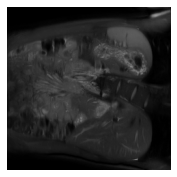

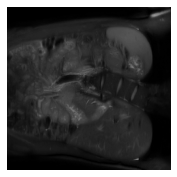

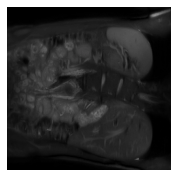

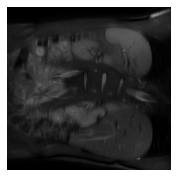

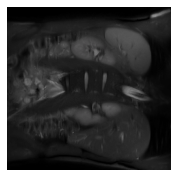

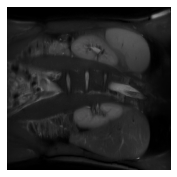

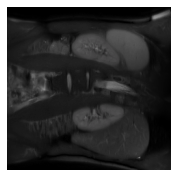

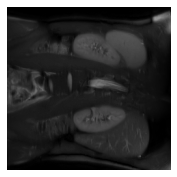

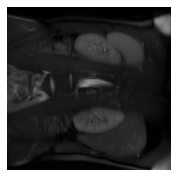

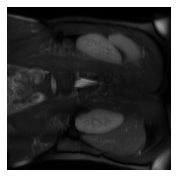

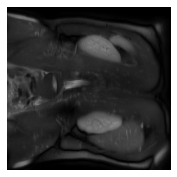

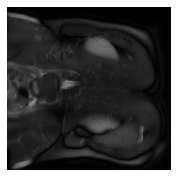

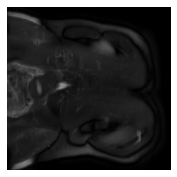

In [11]:
image_path = './MRI1_T2mask.nii.gz'
data = './MRI1_T2.nii.gz'

# image_path = './MRI1_T2.nii.gz'
# image_obj = nib.load(image_path)
# print(f'Type of the image {type(image_obj)}')

# # Extract data as numpy array
# image_data = image_obj.get_fdata()
# print(image_data.shape)

# img = nib.Nifti1Image(image_data, None)

# nib.save(img,'yikes.nii.gz')

# haha = nib.load("./yikes.nii.gz")
# hehe = haha.get_fdata()

# visualize2d(hehe, 13)

image_data = read_data_as_numpy(image_path)
data = read_data_as_numpy(data)
# image_data = torch.from_numpy(image_data)
# image_data.shape
image_data = image_data.astype(bool)

coloured_mask = add_mask_colour(image_data, colour='red')
coloured_mask2 = add_mask_colour(image_data, colour='blue')

# colour = coloured_mask + coloured_mask2

plot_overlapped(data, image_data, image_data)

# for i in range(13):
#     # plt.imshow(data[:,:,i], cmap="gray")
#     plt.imshow(colour[:,:,i,:])
#     plt.axis('off')
#     plt.show()

# visualize2d(image_data)

# h5f = h5py.File('./dataset/T2train.h5','r')
# # X1 = torch.from_numpy(h5f['T2data_1'][:])
# X1 = h5f['T2data_1'][:]
# X1.shape
# type(X1)

In [ ]:
# Get the image shape
#height, width, depth = image_data.shape
channel, depth, width, height = X1.shape
print(f"Image channel : {channel}")
print(f"Image depth : {depth}")
print(f"Image width : {width}")
print(f"Image height : {height}")

In [ ]:
# Visualize Single Image Data
print(X1.shape)
for i in range(depth):
    plt.imshow(X1[0,i,:,:],cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
f, axarr = plt.subplots(7,2)
axarr[0,0].imshow(X1[0,0,:,:],cmap='gray')
axarr[0,1].imshow(X1[0,1,:,:],cmap='gray')
axarr[1,0].imshow(X1[0,2,:,:],cmap='gray')
axarr[1,1].imshow(X1[0,3,:,:],cmap='gray')
axarr[2,0].imshow(X1[0,4,:,:],cmap='gray')
axarr[2,1].imshow(X1[0,5,:,:],cmap='gray')
axarr[3,0].imshow(X1[0,6,:,:],cmap='gray')
axarr[3,1].imshow(X1[0,7,:,:],cmap='gray')
axarr[4,0].imshow(X1[0,8,:,:],cmap='gray')
axarr[4,1].imshow(X1[0,9,:,:],cmap='gray')
axarr[5,0].imshow(X1[0,10,:,:],cmap='gray')
axarr[5,1].imshow(X1[0,11,:,:],cmap='gray')
axarr[6,0].imshow(X1[0,12,:,:],cmap='gray')
axarr[6,1].imshow(X1[0,13,:,:],cmap='gray')


In [ ]:
def explore_3d_image(layer):

    plt.figure(figsize=(5,10))
    plt.imshow(X1[0,layer,:,:],cmap='gray')
    plt.title('Explore Layers of Kidney MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,X1.shape[1]-1))

## Explore data labels

In [ ]:
""" label_path = './dataset/CKD_01/T2_mask.nii.gz'
label_obj = nib.load(label_path)
type(label_obj)
# Label data as numpy array
label_data = label_obj.get_fdata()
type(label_data) """

h5f = h5py.File('./dataset/T2trainmask.h5','r')
X1mask = torch.from_numpy(h5f['T2maskdata_1'][:])
type(X1mask)

In [ ]:
# Get the image shape
#height, width, depth = image_data.shape
channel, depth, width, height = X1mask.shape
print(f"Image channel : {channel}")
print(f"Image depth : {depth}")
print(f"Image width : {width}")
print(f"Image height : {height}")


In [ ]:
# Visualize Single Image Data

for i in range(depth):
    plt.imshow(X1mask[0,i,:,:],cmap='gray')
    plt.axis('off')
    plt.show()

## Mask and Image

In [ ]:
def explore_3d_image(layer):
    
    plt.figure(figsize=(5,10))
    plt.imshow(X1[0,layer,:,:],cmap='gray')
    plt.imshow(X1mask[0,layer,:,:], alpha=0.3)
    plt.title('Explore Segmented MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,X1.shape[1]-1))

In [ ]:
# X1 = X1.numpy()
# X1 = X1.squeeze()

X1mask = X1mask.numpy()
X1mask = X1mask.squeeze()

In [ ]:
# ipv.figure()
# ipv.volshow(X1)
# ipv.show()
view(X1)

In [ ]:
# X1mask = X1mask.numpy()

# X1mask.shape
# Yo = X1mask.astype(bool)
# X1mask[Yo] = 255 

# X1mask = np.pad(X1mask, ((0,2),(0,0),(0,0),(0,0)))

# X1mask.shape
# X1mask.shape

# for i in range(14):
#     plt.imshow(X1mask[:,:,:,i])
#     plt.axis('off')
#     plt.show()

# X1mask = X1mask.astype(np.uint8)

In [ ]:
def explore_3d_image(layer):
    
    plt.figure(figsize=(5,10))
    plt.imshow(X1[layer,:,:],cmap='gray')
    plt.imshow(X1mask[:,:,:,layer], alpha=0.3)
    plt.title('Explore Segmented MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,X1mask.shape[3]-1))